# Appendix: Text Mining Analysis of *Na Minha Rua* App Reviews

## 1. Introduction
This appendix presents a comprehensive text mining analysis conducted on user reviews of the *Na Minha Rua* mobile application. The study aims to extract meaningful insights from user feedback collected from the Google Play Store and Apple App Store platforms. The objectives include understanding user experiences, identifying common issues, and assessing overall satisfaction with the application. The analysis also seeks to determine a "true rating" for the application by correlating sentiment derived from user comments with their provided star ratings. This was particularly important as discrepancies were observed, such as complaints being associated with high ratings.

## 2. Analysis Objectives
The text mining analysis was designed to achieve the following objectives:
1. Collection and aggregation of user reviews from multiple platforms.
2. Analysis of sentiment patterns in user feedback.
3. Identification of recurring themes and issues.
4. Evaluation of user satisfaction across different app versions.
5. Using machine learning models to derive a sentiment-based "true rating" of the application.

## 3. Technical Framework

### 3.1 Data Collection and Preparation
- Reviews were collected from the Google Play Store and Apple App Store using:
  - **`google_play_scraper`**: Extracts user feedback, ratings, and metadata from Android users.
  - **`app_store_scraper`**: Provides similar functionality for iOS user reviews.
- **Data preprocessing** steps included:
  - Cleaning and standardizing text by removing duplicates and ensuring consistency across platforms.
  - Translating non-English reviews to English using the **`googletrans`** library to facilitate uniform analysis.

### 3.2 Text Analysis Components
For text processing and sentiment analysis, the following tools were employed:
- **`googletrans`**: For translation of text into a common language.
- **`wordcloud`**: Visualized frequently occurring terms and themes in reviews.
- **`transformers`**: Utilized a RoBERTa-based sentiment analysis model for nuanced sentiment classification.

### 3.3 Visualization Components
- Tools such as **matplotlib**, **seaborn**, and **plotly** were employed to create:
  - Word clouds.
  - Sentiment trends over time.
  - Comparative visualizations of platform-based feedback.

## 4. Sentiment Analysis Results

### 4.1 TextBlob Sentiment Analysis
- Provided basic sentiment polarity scores as an initial benchmark.
- Limited in accuracy for Portuguese language content.

### 4.2 VADER Sentiment Analysis
- A more sophisticated approach adapted for social media-style content.
- Delivered compound scores and intensity analysis for multilingual data.

### 4.3 RoBERTa-Based Analysis
- The most sophisticated approach, leveraging the transformers architecture.
- Delivered the most accurate correlation between user sentiment and contextual nuances.

### 4.4 Comparative Rating Analysis
The analysis revealed significant differences between platforms and rating methodologies:

#### App Store vs Google Play Store Ratings:
- **Apple App Store**: 1.4 (True rating).
- **Google Play Store**: 2.5 (True rating).

#### Overall User Ratings:
- Combined user rating: 2.04.
  - Google Play Store users: 2.38.
  - Apple App Store users: 1.61.

#### RoBERTa Sentiment-Based Ratings:
- Overall sentiment-based rating: 1.93.
  - Google Play Store: 2.10.
  - Apple App Store: 1.71.

The RoBERTa-based analysis proved most effective in capturing sentiment nuances and aligning them with user-provided ratings while considering contextual factors in the reviews.

## 5. Key Findings

### 5.1 Platform Disparities
- **Apple users** were generally more critical, with ratings averaging between 1.4 and 1.71.
- **Google Play users** showed moderately higher satisfaction, with ratings averaging between 2.1 and 2.5.

### 5.2 Sentiment Correlation
- RoBERTa ratings closely aligned with user-provided scores.
- The model demonstrated superior handling of technical terminology and application-specific context.

### 5.3 Temporal Trends
- A decline in user satisfaction was observed over time.
- Negative sentiment spikes were often correlated with technical issues or poorly received app updates.

### 5.4 Key Problem Areas Identified

**Note:** To identify the key problem areas, we used a curated sample of the most negative and the most positive reviews derived from the dataset. These reviews were further analyzed using Claude, an advanced AI tool, to extract deeper insights into user feedback. This approach allowed for a more detailed examination of user sentiments, recurring issues, and actionable feedback. 

1. **Login and Access Issues**:
   - Problems with credentials and recovery mechanisms prevented users from accessing the application.
2. **Photo Attachment Functionality**:
   - Users reported issues attaching images to complaints.
3. **GPS and Location Services**:
   - Dependence on GPS and inaccuracies in location tracking limited functionality.
4. **Issue Resolution Tracking**:
   - Cases were frequently marked as resolved without effective action.
5. **User Interface Concerns**:
   - The interface was criticized for being unintuitive and technically flawed.
6. **Customer Support Responsiveness**:
   - Users noted a lack of feedback and support for unresolved issues.

## 6. Conclusions and Recommendations
The analysis highlights significant areas for improvement in the *Na Minha Rua* application. By addressing technical issues, enhancing user interface design, and improving customer support, the application can potentially increase user satisfaction and functionality. The study also underscores the importance of sentiment-based metrics in evaluating user feedback, particularly for applications with significant public engagement.


#### Imports

In [7]:
# Imports
!pip install google_play_scraper 
!pip install app_store_scraper
from google_play_scraper import reviews, Sort
import time
import pandas as pd
import numpy as np
import json
!pip install googletrans==4.0.0-rc1
from googletrans import Translator
from textblob import TextBlob
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
!pip install transformers
from transformers import pipeline


  Using cached app_store_scraper-0.3.5-py3-none-any.whl.metadata (5.1 kB)
  Using cached requests-2.23.0-py2.py3-none-any.whl.metadata (6.8 kB)
  Using cached urllib3-1.25.11-py2.py3-none-any.whl.metadata (41 kB)
Using cached app_store_scraper-0.3.5-py3-none-any.whl (8.3 kB)
Using cached requests-2.23.0-py2.py3-none-any.whl (58 kB)
Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.2
    Uninstalling urllib3-2.2.2:
      Successfully uninstalled urllib3-2.2.2
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-client 1.12.3 requires urllib3>=1.26.4, but you have urllib3 1.25.11 which is incompatible.
conda 24.5.0 requires requests<3,>=2.28.0, but you have requests 2.23.0 which is incompatible.
conda-repo-cli 1.0.88 requires requests>=2.31.0, but you have requests 2.23.0 which is incompatible.
jupyterlab-server 2.25.1 requires requests>=2.31, but you have requests 2.23.0 which is incompatible.
sphinx 7.3.7 requires requests>=2.25.0, but you have requests 2.23.0 which is incompatible.


## Google Play Scraping

In [72]:
# Define the app's unique identifier for Google Play
app_id_google_play = 'pt.cml.naminharualx'

# Initialize an empty list to store reviews with comments
all_reviews_with_comments_google_play = []

# Set initial values
continuation_token = None
sort_order = Sort.NEWEST  # You can use Sort.NEWEST or Sort.RATING

# Loop to fetch all reviews
while True:
    try:
        result, continuation_token = reviews(
            app_id_google_play,
            lang='pt',  # Language of the reviews
            country='PT',  # Country of the reviews
            sort=sort_order,  # Sort order of reviews
            count=200,  # Number of reviews to fetch per request
            continuation_token=continuation_token
        )

        # Check if there are reviews fetched
        if not result:
            print("No more reviews to fetch.")
            break

        # Filter reviews to only include those with comments
        reviews_with_comments = [review for review in result if review.get('content')]
        all_reviews_with_comments_google_play.extend(reviews_with_comments)

        # Print the number of reviews fetched so far
        print(f"Fetched {len(reviews_with_comments)} reviews with comments, Total: {len(all_reviews_with_comments_google_play)}")

        # To avoid hitting the server too quickly, add a small delay
        time.sleep(1)

    except Exception as e:
        print(f"Error occurred: {e}")
        break

# Print the total number of reviews fetched
print(f"Total reviews with comments fetched from Google Play Store: {len(all_reviews_with_comments_google_play)}")

# Display a sample of the reviews with comments
for review in all_reviews_with_comments_google_play[:5]:  # Displaying first 5 reviews
    print(f"User: {review['userName']}")
    print(f"Rating: {review['score']}")
    print(f"Review: {review['content']}")
    print('-' * 40)
reviews_google  = pd.json_normalize(all_reviews_with_comments_google_play)
reviews_google.head()

Fetched 164 reviews with comments, Total: 164
No more reviews to fetch.
Total reviews with comments fetched from Google Play Store: 164
User: Daniel Calado
Rating: 5
Review: Muito prático e eficaz
----------------------------------------
User: Nuno Pereira
Rating: 1
Review: Não é possível submeter, e-mail inválido!
----------------------------------------
User: João Araujo
Rating: 2
Review: Impossível aceder APP...
----------------------------------------
User: Aze Teka
Rating: 1
Review: Aplicação apresenta o erro, "não consegue apresentar informação" não está funcional.
----------------------------------------
User: Paulo Silva
Rating: 2
Review: Uma excelente ideia pessimamente implementada.
----------------------------------------


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,afb2456d-e407-4c4c-af81-1b1461767b22,Daniel Calado,https://play-lh.googleusercontent.com/a-/ALV-UjVdM4cw-E63GdnDjqIhlcUW4GOsd4i2hi336iAvl_vObQEpuspk8A,Muito prático e eficaz,5,0,1.0.11,2024-07-01 19:42:33,None,NaT,1.0.11
1,2cb8ac76-23d2-4b3f-bd94-b4b715339b15,Nuno Pereira,https://play-lh.googleusercontent.com/a-/ALV-UjUkI8_exlaXHFy8iB4kYCnY8Ran8mOPBlz5SOOLh2YlPPMpr44,"Não é possível submeter, e-mail inválido!",1,2,1.0.11,2024-06-24 17:00:57,None,NaT,1.0.11
2,59b240cb-19f3-4405-957e-af66c21d511c,João Araujo,https://play-lh.googleusercontent.com/a/ACg8ocISuQMPOd4guBmMcVAk-lzjFpMGjdDn7a0yuuEP-zc2mgjA4w=mo,Impossível aceder APP...,2,2,1.0.11,2024-06-15 15:29:01,None,NaT,1.0.11
3,1f64ee5f-5683-4b96-bc98-26120b269252,Aze Teka,https://play-lh.googleusercontent.com/a-/ALV-UjWmbY2x5JGZCdoFhjHFls5WyjOe2Wj-GitUTLtx_xs9iRIf-5-K,"Aplicação apresenta o erro, ""não consegue apresentar informação"" não está funcional.",1,2,1.0.11,2024-06-13 14:06:26,None,NaT,1.0.11
4,2d3369eb-05d5-4a1b-9730-de32f76e0e5a,Paulo Silva,https://play-lh.googleusercontent.com/a/ACg8ocIYJgQVPNN8Z9_QrH_AFSDV2IdCTZ1bzcGsg-jA52Dp3e8fjQ=mo,Uma excelente ideia pessimamente implementada.,2,1,1.0.11,2024-06-10 09:01:38,None,NaT,1.0.11


##Apple Store Scraping

In [73]:
from app_store_scraper import AppStore

all_reviews_with_comments_aplle_store = AppStore(country='pt', app_name='naminharua-lx', app_id = '1186245468')

all_reviews_with_comments_aplle_store.review(how_many=2000)
all_reviews_with_comments_aplle_store = pd.DataFrame(np.array(all_reviews_with_comments_aplle_store.reviews), columns=['review'])
reviews_apple = all_reviews_with_comments_aplle_store.join(pd.DataFrame(all_reviews_with_comments_aplle_store.pop('review').tolist()))
reviews_apple.head()

2024-07-03 14:55:37,463 [INFO] Base - Initialised: AppStore('pt', 'naminharua-lx', 1186245468)
2024-07-03 14:55:37,463 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/pt/app/naminharua-lx/id1186245468
2024-07-03 14:55:40,426 [INFO] Base - [id:1186245468] Fetched 127 reviews (127 fetched in total)


,date,review,rating,isEdited,title,userName,developerResponse
0,2024-05-18 10:12:14,"A app encerra abruptamente quando se pretende reportar uma ocorrência mesmo na parte final, o que invalida o tempo dispêndido a preencher o campo da descrição.",1,False,A app não funciona - dispositivo móvel com iOS,Utilizador lx,NaN
1,2024-07-01 15:26:25,Estou com o mesmo problema já reportado por outro utilizador. A app apaga depois de finalizados os passos todos do report.,1,False,Bloqueio da app,Habitante da graça,NaN
2,2022-01-07 18:38:00,"A ideia da App é genial e realmente funciona pois a resposta da CML até é bastante rápida após o pedido, mas a App é pouco intuitiva, bloqueia muito, tem imensas opções deidentificação do pedido que para o utilizador não é prático…e só serve para os trabalhadores da cml. Acontence imensas vezes bloquear no mapa e quando se volta para tras para desbloquear entra numa pagina inicial com a imagem do electrico com um texto em latim e já não se consegue avançar para a frente, tem que se esperar um dia e voltar a entrar!",2,False,Ideia genial mas bloqueia muito,alibabacas,NaN
3,2024-06-27 09:49:16,Demora tanto tempo a preencher e no fim crasha e não permite submeter,1,False,Aplicação encerra e não permite submeter,RafaCT1,NaN
4,2024-06-26 22:08:53,"A aplicação crasha quando se submete uma ocorrência. Não vale a pena instalar. Antes, quando funcionava, até era útil mas vem se degradando desde 2019.",1,False,Aplicação crasha Não vale a pena instalar,hajatento,NaN


## Google Reviews Cleaning

In [75]:
# Create a new column 'app' to indicate the source of the reviews
reviews_google['app'] = 'google'

reviews_google = reviews_google.drop(columns=['reviewId', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent', 'repliedAt', 'appVersion'])
reviews_google = reviews_google.rename(columns={'content': 'review', 'score': 'rating', 'at': 'date'})

## Apple Reviews Cleaning

In [77]:
# Create a new column 'app' to indicate the source of the reviews
reviews_apple['app'] = 'apple'

reviews_apple = reviews_apple.drop(columns=['isEdited', 'developerResponse'])
reviews_apple = reviews_apple.rename(columns={'review': 'review1'})
reviews_apple["review"] = reviews_apple['title'].astype(str) +"-"+ reviews_apple["review1"]

In [79]:
pd.set_option('display.max_colwidth', None)
reviews_apple['review'].head()

0                                                                                                                                                                                                                                                                                                                                                              A app não funciona - dispositivo móvel com iOS-A app encerra abruptamente quando se pretende reportar uma ocorrência mesmo na parte final, o que invalida o tempo dispêndido a preencher o campo da descrição.
1                                                                                                                                                                                                                                                                                                                                                                                                                                  Bloqueio da app-Estou c

In [80]:
reviews_apple = reviews_apple.drop(columns=['review1', 'title'])

## Combining DataFrames

In [81]:
# Combine all DataFrames into a single DataFrame
reviews = pd.concat([reviews_google, reviews_apple], ignore_index=True)
reviews.head(100)

,userName,review,rating,date,app
0,Daniel Calado,Muito prático e eficaz,5,2024-07-01 19:42:33,google
1,Nuno Pereira,"Não é possível submeter, e-mail inválido!",1,2024-06-24 17:00:57,google
2,João Araujo,Impossível aceder APP...,2,2024-06-15 15:29:01,google
3,Aze Teka,"Aplicação apresenta o erro, ""não consegue apresentar informação"" não está funcional.",1,2024-06-13 14:06:26,google
4,Paulo Silva,Uma excelente ideia pessimamente implementada.,2,2024-06-10 09:01:38,google
...,...,...,...,...,...
95,Um usuário do Google,O maior problema é a aplicação nao dar para criar ocorrencias sem ter o GPS ligado o que a torna inutil talve seja este o objectivo da CML pois com o GPS ligado nem sempre a localização fica correcta e da para a sua correção. Fazer no desktop é mais difícil por causa da passagem das fotos do telemóvel uma opção de desactivar o GPS seria mais eficaz só hoje tenho 6 que pode ser que alguém as reporte ou que o sinal de trânsito caia em cima de um carro ou alguém e que a rotura de água aumente ainda mais incrível tal reapoata. Pois nem sempre o GPS indica o local exacto da ocorrência e mudando o local ela não aceita daí inútil mais uma vez,1,2020-01-03 18:01:39,google
96,Um usuário do Google,"Uso bastante esta app. Infelizmente a CML dá como resolvidos problemas recorrentes, como é o caso dos contentores subterrâneos que se transformaram em lixeiras a céu aberto,; a falta de estacionamento exclusivo para os moradores no centro da centro da cidade cuja naior parte dos prédios não têm garagens (como por exemplo a zona 14); colocação indiscriminada de ciclovias e de passeios pedonais, retirando estacionamento, faixas de rodagem e lugares de estacionamento (ex: Av. Defensores de Chaves).",2,2019-12-28 16:29:04,google
97,Um usuário do Google,Muito complicado e lento,1,2019-10-12 15:12:01,google
98,Um usuário do Google,"Não serve para nada. Diz que as credenciais são inválidas, não permite a recuperação e aparece erro do servidor",1,2019-10-06 05:35:35,google


# Data Cleaning Steps

In [83]:
# Concatenated DataFrame

# Step 1: Check for Missing Values
missing_values = reviews.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Step 2: Verify Data Types and Convert if Necessary
print("\nData types before conversion:\n", reviews.dtypes)

# Convert 'date' column to datetime
reviews['date'] = pd.to_datetime(reviews['date'], errors='coerce')

print("\nData types after conversion:\n", reviews.dtypes)

# Step 3: Check for Duplicates
duplicates = reviews.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Remove duplicates
reviews = reviews.drop_duplicates()

# Step 4: Standardize Column Names (if not already done)
reviews.columns = reviews.columns.str.lower()

print("\nColumn names after standardization:\n", reviews.columns)

# Display the first few rows of the cleaned DataFrame
print("\nSample of the cleaned DataFrame:\n", reviews.head())


Missing values in each column:
 userName    0
review      0
rating      0
date        0
app         0
dtype: int64

Data types before conversion:
 userName            object
review              object
rating               int64
date        datetime64[ns]
app                 object
dtype: object

Data types after conversion:
 userName            object
review              object
rating               int64
date        datetime64[ns]
app                 object
dtype: object

Number of duplicate rows: 0

Column names after standardization:
 Index(['username', 'review', 'rating', 'date', 'app'], dtype='object')

Sample of the cleaned DataFrame:
         username  \
0  Daniel Calado   
1   Nuno Pereira   
2    João Araujo   
3       Aze Teka   
4    Paulo Silva   

                                                                                 review  \
0                                                                Muito prático e eficaz   
1                                             Nã

# Translating Reviews

In [88]:
# Initialize the translator
translator = Translator()

# Function to translate reviews
def translate_review(review):
    try:
        translated = translator.translate(review, src='pt', dest='en')
        return translated.text
    except Exception as e:
        return str(e)

# Apply the translation function to the 'review' column
reviews['review_english'] = reviews['review'].apply(translate_review)

# Display a sample of the DataFrame to check the translations
print(reviews[['review', 'review_english']].head())

                                                                                 review  \
0                                                                Muito prático e eficaz   
1                                             Não é possível submeter, e-mail inválido!   
2                                                              Impossível aceder APP...   
3  Aplicação apresenta o erro, "não consegue apresentar informação" não está funcional.   
4                                        Uma excelente ideia pessimamente implementada.   

                                                                     review_english  
0                                                      Very practical and effective  
1                                      It is not possible to submit, invalid email!  
2                                                      Impossible to access app ...  
3  Application presents the error, "can not present information" is not functional.  
4                      

# Exploratory Data Analysis (EDA)

2024-07-03 14:55:40,563 [INFO] matplotlib.category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-03 14:55:40,567 [INFO] matplotlib.category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


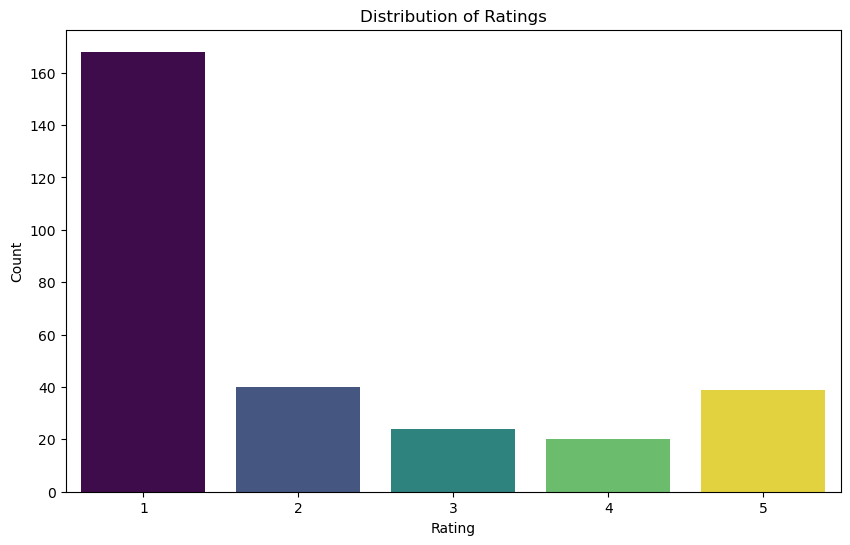

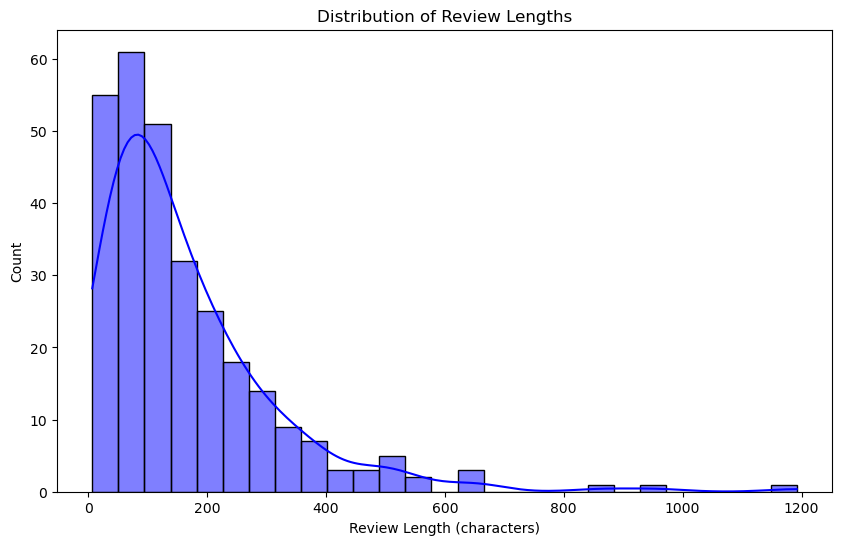

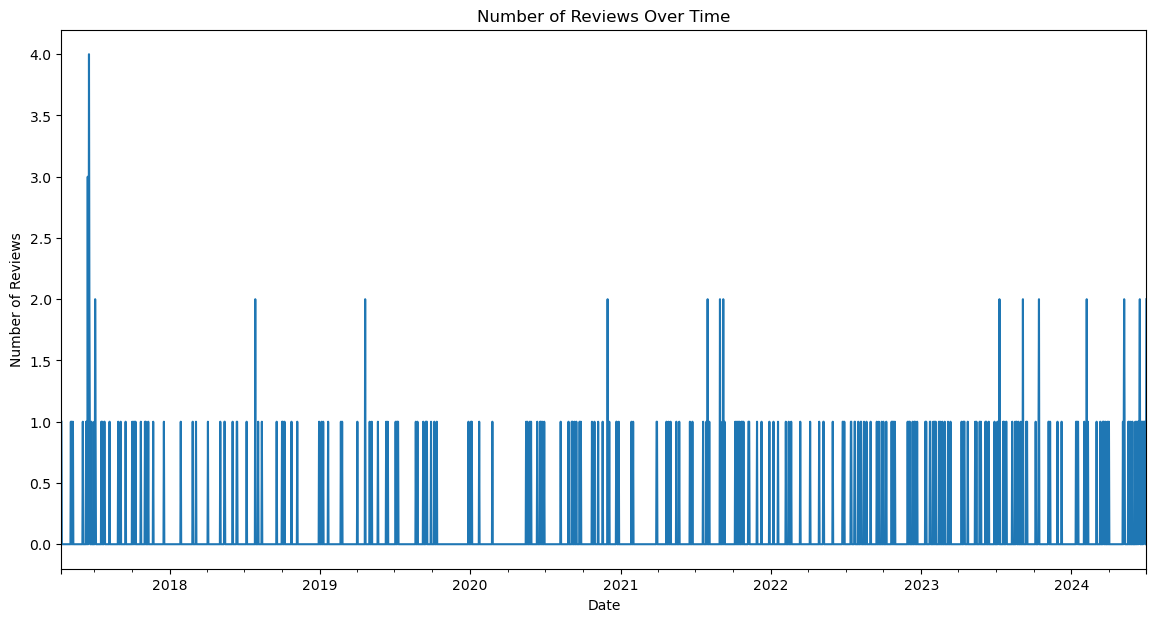

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ratings Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=reviews, palette='viridis', hue='rating', dodge=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend([], [], frameon=False)
plt.show()
#plt.savefig('ratings_distribution.png')

# 2. Review Length Analysis
reviews['review_length'] = reviews['review'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(reviews['review_length'], kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()
#plt.savefig('review_length_distribution.png')

# Temporal Trends
plt.figure(figsize=(14, 7))
reviews.set_index('date').resample('D').size().plot(kind='line')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()
#plt.savefig('reviews_over_time.png')


# Text Blob Sentiment


**Note**: TextBlob provides a polarity score directly, but it does not provide separate negative, neutral, positive, or compound scores like VADER and Roberta.

In [90]:
# Function to analyze sentiment
def analyze_sentiment(review):
    analysis = TextBlob(review)
    # Get the polarity score
    polarity = analysis.sentiment.polarity
    # Classify the polarity
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity == 0:
        sentiment = 'Neutral'
    else:
        sentiment = 'Negative'
    return sentiment, polarity

# Apply the sentiment analysis function to the translated reviews
reviews['textblob_sentiment'], reviews['textblob_polarity'] = zip(*reviews['review_english'].apply(analyze_sentiment))

# Display a sample of the DataFrame to check the sentiment labels and polarity values
print(reviews[['review_english', 'textblob_sentiment', 'textblob_polarity']].head())

                                                                     review_english  \
0                                                      Very practical and effective   
1                                      It is not possible to submit, invalid email!   
2                                                      Impossible to access app ...   
3  Application presents the error, "can not present information" is not functional.   
4                                              An excellent idea badly implemented.   

  textblob_sentiment  textblob_polarity  
0           Positive           0.400000  
1            Neutral           0.000000  
2           Negative          -0.666667  
3            Neutral           0.000000  
4           Positive           0.150000  


## Plot Text blob Sentiment

In [92]:
# Display a sample of the DataFrame to check the sentiment labels and polarity values
print(reviews[['review', 'textblob_sentiment', 'rating']].head())

                                                                                 review  \
0                                                                Muito prático e eficaz   
1                                             Não é possível submeter, e-mail inválido!   
2                                                              Impossível aceder APP...   
3  Aplicação apresenta o erro, "não consegue apresentar informação" não está funcional.   
4                                        Uma excelente ideia pessimamente implementada.   

  textblob_sentiment  rating  
0           Positive       5  
1            Neutral       1  
2           Negative       2  
3            Neutral       1  
4           Positive       2  


# Vader Sentiment Scoring - Valence Aware Dictionary and Sentiment Reasoner



In [95]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [96]:
analyzer.polarity_scores('Very practical and effective')

{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.5209}

In [97]:
# Function to analyze sentiment using VADER
def vader_sentiment(review):
    vs = analyzer.polarity_scores(review)
    # Classify the compound score into categories
    if vs['compound'] >= 0.05:
        sentiment = 'Positive'
    elif vs['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return sentiment, vs['neg'], vs['neu'], vs['pos'], vs['compound']

# Apply the VADER sentiment analysis function to the translated reviews
reviews['vader_sentiment'], reviews['vader_neg'], reviews['vader_neu'], reviews['vader_pos'], reviews['vader_compound'] = zip(*reviews['review_english'].apply(vader_sentiment))

# Display a sample of the DataFrame to check the sentiment labels and polarity values
print(reviews[['review_english', 'vader_sentiment', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']].head())


                                                                     review_english  \
0                                                      Very practical and effective   
1                                      It is not possible to submit, invalid email!   
2                                                      Impossible to access app ...   
3  Application presents the error, "can not present information" is not functional.   
4                                              An excellent idea badly implemented.   

  vader_sentiment  vader_neg  vader_neu  vader_pos  vader_compound  
0        Positive      0.000      0.471      0.529          0.5209  
1         Neutral      0.000      1.000      0.000          0.0000  
2         Neutral      0.000      1.000      0.000          0.0000  
3        Negative      0.213      0.787      0.000         -0.4019  
4        Positive      0.316      0.306      0.378          0.1531  


**Explanation**:

- VADER Sentiment Analyzer: VADER is a lexicon and rule-based sentiment analysis tool specifically attuned to sentiments expressed in social media.

- Compound Score: The compound score is a normalized score ranging from -1 (most negative) to +1 (most positive). We use thresholds (e.g., >= 0.05 for positive, <= -0.05 for negative) to classify sentiments.

In [100]:
# Visualisation to create customised sentiment rules
# Filter DataFrame for each sentiment category
positive_reviews = reviews[reviews['vader_sentiment'] == 'Positive']
negative_reviews = reviews[reviews['vader_sentiment'] == 'Negative']
neutral_reviews = reviews[reviews['vader_sentiment'] == 'Neutral']

# Save each category to a separate CSV file
positive_reviews.to_csv('positive_reviews.csv', index=False)
negative_reviews.to_csv('negative_reviews.csv', index=False)
neutral_reviews.to_csv('neutral_reviews.csv', index=False)

print("Separate CSV files have been saved for each sentiment category:")
print("- Positive reviews saved to 'positive_reviews.csv'")
print("- Negative reviews saved to 'negative_reviews.csv'")
print("- Neutral reviews saved to 'neutral_reviews.csv'")

# Ensure that review_english column contains strings
positive_reviews.loc[:, 'review_english'] = positive_reviews['review_english'].astype(str)
negative_reviews.loc[:, 'review_english'] = negative_reviews['review_english'].astype(str)
neutral_reviews.loc[:, 'review_english'] = neutral_reviews['review_english'].astype(str)

Separate CSV files have been saved for each sentiment category:
- Positive reviews saved to 'positive_reviews.csv'
- Negative reviews saved to 'negative_reviews.csv'
- Neutral reviews saved to 'neutral_reviews.csv'


In [101]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment using VADER
def vader_sentiment(review):
    vs = analyzer.polarity_scores(review)
    # Classify the compound score into categories
    if vs['compound'] >= 0.05:
        sentiment = 'Positive'
    elif vs['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return sentiment, vs['neg'], vs['neu'], vs['pos'], vs['compound']

# Apply the VADER sentiment analysis function to the reviews
reviews['vader_sentiment'], reviews['vader_neg'], reviews['vader_neu'], reviews['vader_pos'], reviews['vader_compound'] = zip(*reviews['review_english'].apply(vader_sentiment))

# Function to map custom sentiment rules
def custom_sentiment(review, default_sentiment, neg, neu, pos, compound):
    # Define custom rules
    negative_phrases = [
        "not possible", "impossible", "error", "badly implemented",
        "no effective response", "crash", "doesn't work", "waste of time",
        "bugs", "poor", "mediocre"
    ]
    positive_phrases = [
        "excellent", "great", "love", "amazing", "fantastic",
        "very good", "well done", "works perfectly"
    ]
    neutral_phrases = [
        "okay", "average", "not bad", "decent"
    ]
    
    # Check for negative phrases
    for phrase in negative_phrases:
        if phrase in review.lower():
            return 'Negative', neg, neu, pos, compound
    
    # Check for positive phrases
    for phrase in positive_phrases:
        if phrase in review.lower():
            return 'Positive', neg, neu, pos, compound
    
    # Check for neutral phrases
    for phrase in neutral_phrases:
        if phrase in review.lower():
            return 'Neutral', neg, neu, pos, compound
    
    # Return default sentiment if no custom rules apply
    return default_sentiment, neg, neu, pos, compound

# Apply custom rules to the VADER sentiment results
reviews[['vader_sentiment_updated', 'vader_neg_updated', 'vader_neu_updated', 'vader_pos_updated', 'vader_compound_updated']] = reviews.apply(
    lambda row: custom_sentiment(row['review_english'], row['vader_sentiment'], row['vader_neg'], row['vader_neu'], row['vader_pos'], row['vader_compound']), axis=1, result_type='expand'
)

# Display a sample of the DataFrame to check the final sentiment labels and compound scores
print(reviews[['review_english', 'vader_sentiment_updated', 'vader_neg_updated', 'vader_neu_updated', 'vader_pos_updated', 'vader_compound_updated']].head())


                                                                     review_english  \
0                                                      Very practical and effective   
1                                      It is not possible to submit, invalid email!   
2                                                      Impossible to access app ...   
3  Application presents the error, "can not present information" is not functional.   
4                                              An excellent idea badly implemented.   

  vader_sentiment_updated  vader_neg_updated  vader_neu_updated  \
0                Positive              0.000              0.471   
1                Negative              0.000              1.000   
2                Negative              0.000              1.000   
3                Negative              0.213              0.787   
4                Negative              0.316              0.306   

   vader_pos_updated  vader_compound_updated  
0              0.529       

In [102]:
# Display a sample of the DataFrame to check and compare the final sentiment labels and compound scores
print(reviews[['review_english', 'vader_sentiment', 'vader_sentiment_updated', 'vader_compound', 'vader_compound_updated']].head())

                                                                     review_english  \
0                                                      Very practical and effective   
1                                      It is not possible to submit, invalid email!   
2                                                      Impossible to access app ...   
3  Application presents the error, "can not present information" is not functional.   
4                                              An excellent idea badly implemented.   

  vader_sentiment vader_sentiment_updated  vader_compound  \
0        Positive                Positive          0.5209   
1         Neutral                Negative          0.0000   
2         Neutral                Negative          0.0000   
3        Negative                Negative         -0.4019   
4        Positive                Negative          0.1531   

   vader_compound_updated  
0                  0.5209  
1                  0.0000  
2                  0.0000 

2024-07-03 14:56:37,243 [INFO] matplotlib.category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\joaom\AppData\Local\Temp\ipykernel_8608\1149685057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=reviews, x='rating', y='vader_compound_updated', palette='viridis')
2024-07-03 14:56:37,250 [INFO] matplotlib.category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


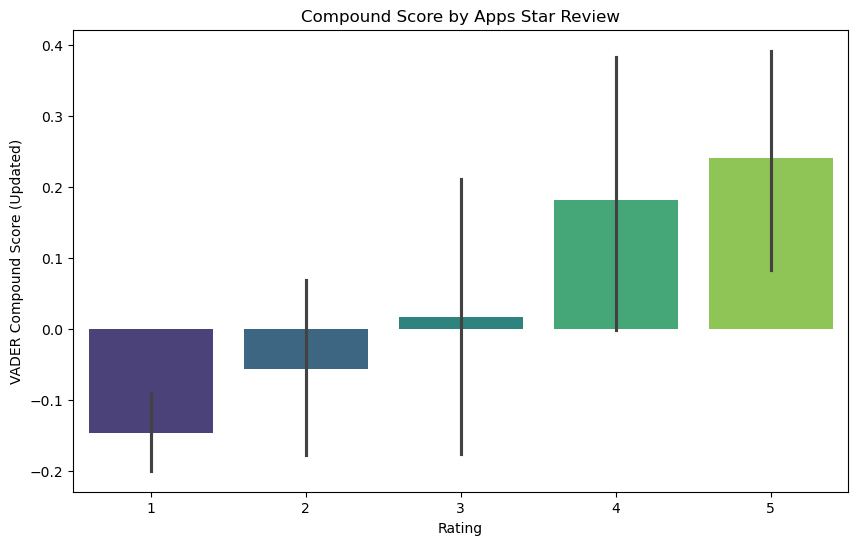

In [104]:
# Create a bar plot with rating on the x-axis and vader_compound_updated on the y-axis
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=reviews, x='rating', y='vader_compound_updated', palette='viridis')
ax.set_title('Compound Score by Apps Star Review')
ax.set_xlabel('Rating')
ax.set_ylabel('VADER Compound Score (Updated)')
plt.show()

## Plot Vader Results

2024-07-03 14:56:37,440 [INFO] matplotlib.category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\joaom\AppData\Local\Temp\ipykernel_8608\3901910763.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reviews, x='rating', y='vader_neg_updated', palette='viridis', ax=axs[0])
2024-07-03 14:56:37,445 [INFO] matplotlib.category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-03 14:56:37,536 [INFO] matplotlib.category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be 

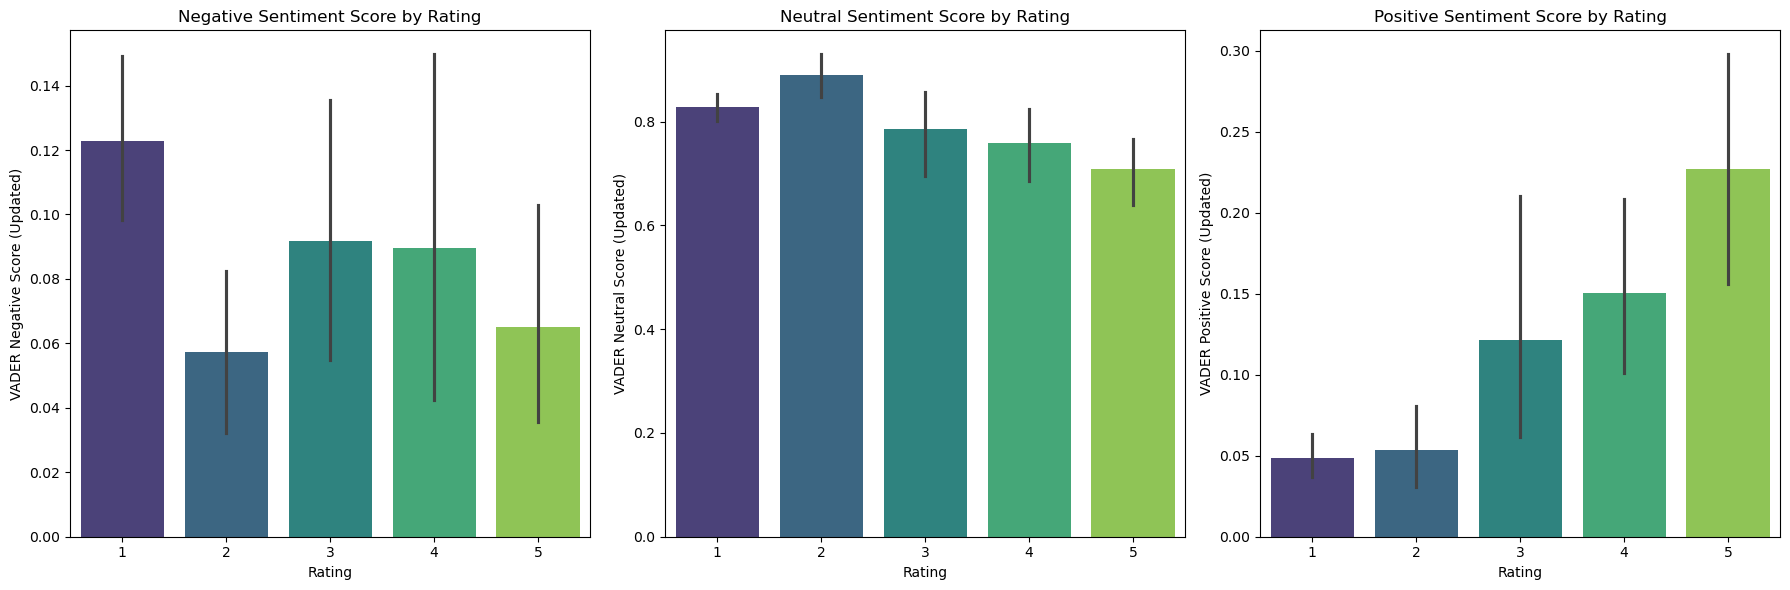

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the negative sentiment scores
sns.barplot(data=reviews, x='rating', y='vader_neg_updated', palette='viridis', ax=axs[0])
axs[0].set_title('Negative Sentiment Score by Rating')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('VADER Negative Score (Updated)')

# Plot the neutral sentiment scores
sns.barplot(data=reviews, x='rating', y='vader_neu_updated', palette='viridis', ax=axs[1])
axs[1].set_title('Neutral Sentiment Score by Rating')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('VADER Neutral Score (Updated)')

# Plot the positive sentiment scores
sns.barplot(data=reviews, x='rating', y='vader_pos_updated', palette='viridis', ax=axs[2])
axs[2].set_title('Positive Sentiment Score by Rating')
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('VADER Positive Score (Updated)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
               

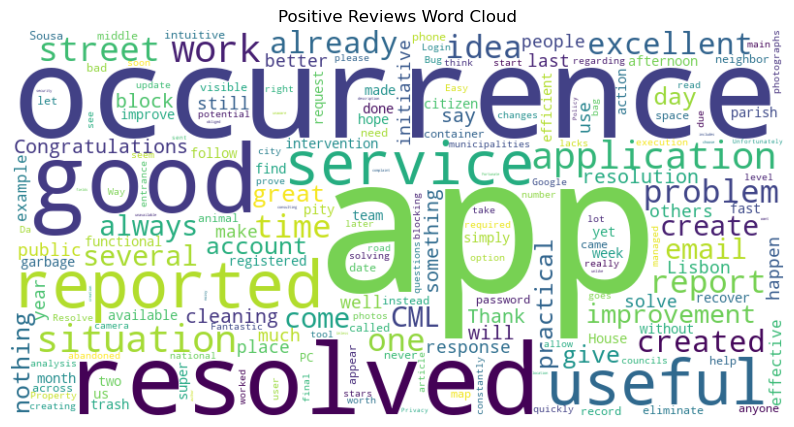

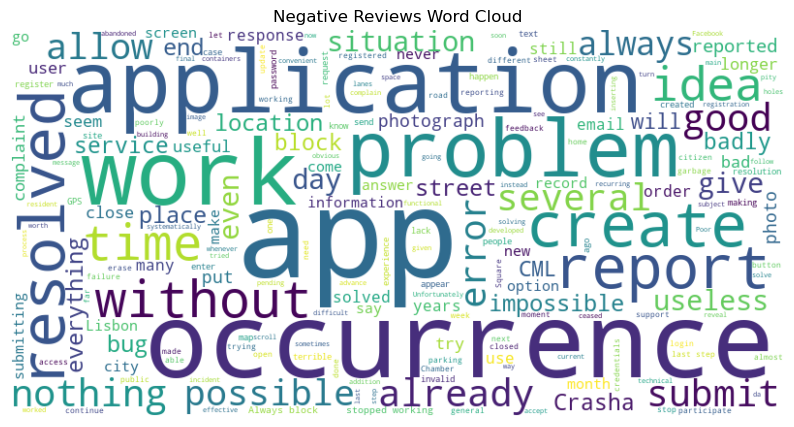

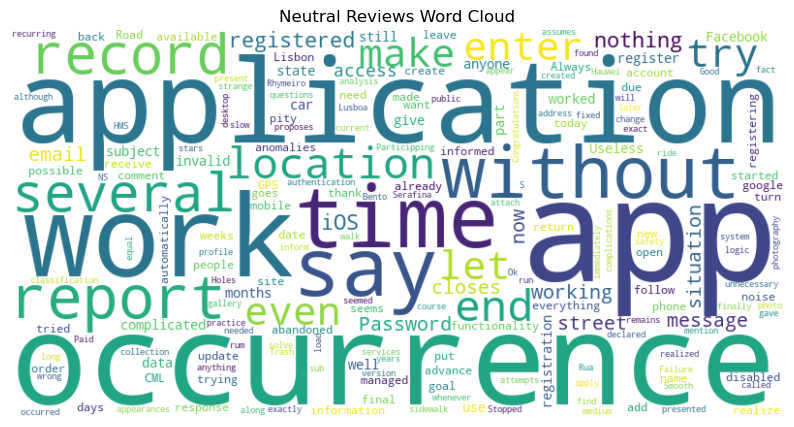

In [106]:
from wordcloud import WordCloud

# Function to generate and display a word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment
positive_reviews = ' '.join(reviews[reviews['vader_sentiment_updated'] == 'Positive']['review_english'])
negative_reviews = ' '.join(reviews[reviews['vader_sentiment_updated'] == 'Negative']['review_english'])
neutral_reviews = ' '.join(reviews[reviews['vader_sentiment_updated'] == 'Neutral']['review_english'])

plot_wordcloud(positive_reviews, 'Positive Reviews Word Cloud')
plot_wordcloud(negative_reviews, 'Negative Reviews Word Cloud')
plot_wordcloud(neutral_reviews, 'Neutral Reviews Word Cloud')


# RoBERTa for Sentiment Analysis - Robustly optimized Bidirectional Encoder Representation from Transformers approach

**Note**: 
- Roberta is a model trained of a large corpus of data.
- Roberta accounts for the words but also the context related to other words.
- In the transformers library by Hugging Face, the pipeline function for sentiment analysis automatically handles tokenization, so we do not need to tokenize the text manually before using it. The pipeline function takes care of all necessary preprocessing steps, including tokenization.

In [109]:
# Loading the sentiment analysis pipeline with a pre-trained RoBERTa model
sentiment_analysis = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

In [110]:
# Loading the sentiment analysis pipeline with a pretrained RoBERTa model
sentiment_analysis = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Loading the CSV files
positive_reviews = pd.read_csv('positive_reviews.csv')
negative_reviews = pd.read_csv('negative_reviews.csv')
neutral_reviews = pd.read_csv('neutral_reviews.csv')

# Extract reviews for testing (first few lines)
positive_sample_reviews = positive_reviews['review_english'].head().tolist()
negative_sample_reviews = negative_reviews['review_english'].head().tolist()
neutral_sample_reviews = neutral_reviews['review_english'].head().tolist()

# Function to analyze sentiment and print results
def analyze_and_print_reviews(sample_reviews, category):
    results = sentiment_analysis(sample_reviews)
    print(f"Sentiment analysis for {category} reviews:")
    for review, result in zip(sample_reviews, results):
        print(f"Review: {review}\nSentiment: {result['label']}, Score: {result['score']}\n")

# Analyze and print sentiments
analyze_and_print_reviews(positive_sample_reviews, 'Positive')
analyze_and_print_reviews(negative_sample_reviews, 'Negative')
analyze_and_print_reviews(neutral_sample_reviews, 'Neutral')



Sentiment analysis for Positive reviews:
Review: Very practical and effective
Sentiment: LABEL_2, Score: 0.8686820268630981

Review: An excellent idea badly implemented.
Sentiment: LABEL_2, Score: 0.644403874874115

Review: When consulting an occurrence (for example, through the map), one of the fields that should be visible is the date of creation of the occurrence.Unless the author includes the date in the description of the occurrence, we are unaware when it was registered.
Sentiment: LABEL_1, Score: 0.7786567211151123

Review: I can't make the complaint I want- on the phone says it's unavailable ?????????
Sentiment: LABEL_0, Score: 0.944402277469635

Review: Occurrences of "public and noisy security" are not visible to other users, unlike other occurrences!
Sentiment: LABEL_0, Score: 0.4777948558330536

Sentiment analysis for Negative reviews:
Review: Application presents the error, "can not present information" is not functional.
Sentiment: LABEL_0, Score: 0.9097289443016052

Revi

 - LABEL_0 corresponds to Negative
 - LABEL_1 corresponds to Neutral
 - LABEL_2 corresponds to Positive

In [112]:
# Initialize the RoBERTa sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Function to map RoBERTa labels to human-readable sentiments and extract scores
def map_label_to_sentiment(result):
    label_map = {
        "LABEL_0": "Negative",  # LABEL_0 corresponds to Negative
        "LABEL_1": "Neutral",   # LABEL_1 corresponds to Neutral
        "LABEL_2": "Positive"   # LABEL_2 corresponds to Positive
    }
    sentiment = label_map[result[0]['label']]
    score = result[0]['score']
    
    # Create separate scores for each sentiment based on the predicted sentiment
    if sentiment == 'Negative':
        neg_score = score
        neu_score = (1 - score) / 2
        pos_score = (1 - score) / 2
    elif sentiment == 'Neutral':
        neg_score = (1 - score) / 2
        neu_score = score
        pos_score = (1 - score) / 2
    else:
        neg_score = (1 - score) / 2
        neu_score = (1 - score) / 2
        pos_score = score
    
    return sentiment, neg_score, neu_score, pos_score

# Function to get sentiment using RoBERTa and map to human-readable labels and scores
def get_roberta_sentiment(review):
    result = sentiment_analysis(review)
    return map_label_to_sentiment(result)

# Apply the RoBERTa sentiment analysis function to the reviews
reviews['roberta_sentiment'], reviews['roberta_neg'], reviews['roberta_neu'], reviews['roberta_pos'] = zip(*reviews['review_english'].apply(get_roberta_sentiment))

# Display a sample of the DataFrame to check the sentiment labels and scores
print(reviews[['review_english', 'roberta_sentiment', 'roberta_neg', 'roberta_neu', 'roberta_pos']].head())

                                                                     review_english  \
0                                                      Very practical and effective   
1                                      It is not possible to submit, invalid email!   
2                                                      Impossible to access app ...   
3  Application presents the error, "can not present information" is not functional.   
4                                              An excellent idea badly implemented.   

  roberta_sentiment  roberta_neg  roberta_neu  roberta_pos  
0          Positive     0.065659     0.065659     0.868682  
1          Negative     0.932360     0.033820     0.033820  
2          Negative     0.686716     0.156642     0.156642  
3          Negative     0.909729     0.045136     0.045136  
4          Positive     0.177798     0.177798     0.644404  


# Comparison and Conclusions 

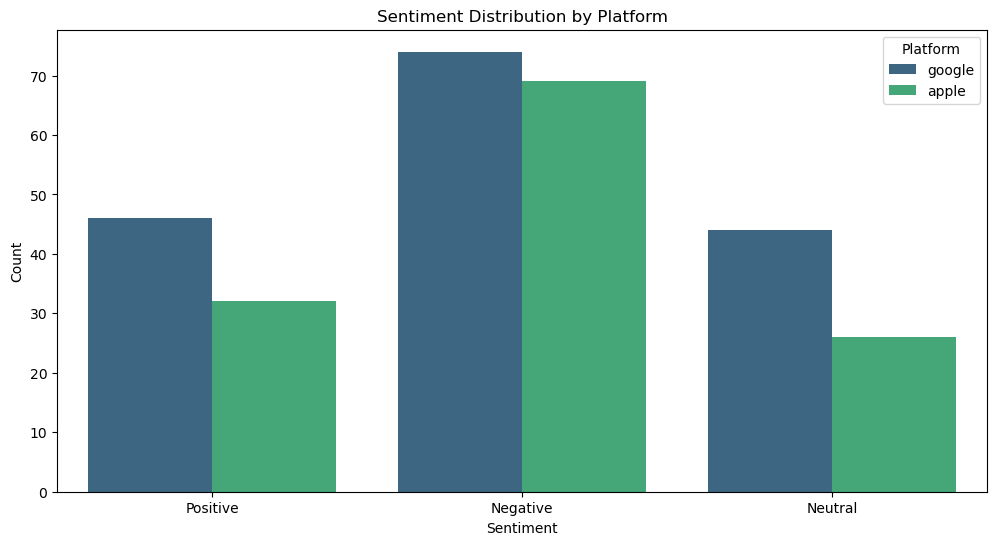

In [143]:
# Platform-wise Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='vader_sentiment_updated', hue='app', data=reviews, palette='viridis')
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Platform')
plt.show()

C:\Users\joaom\AppData\Local\Temp\ipykernel_8608\1299744140.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_sentiment_updated', data=reviews, palette='viridis')


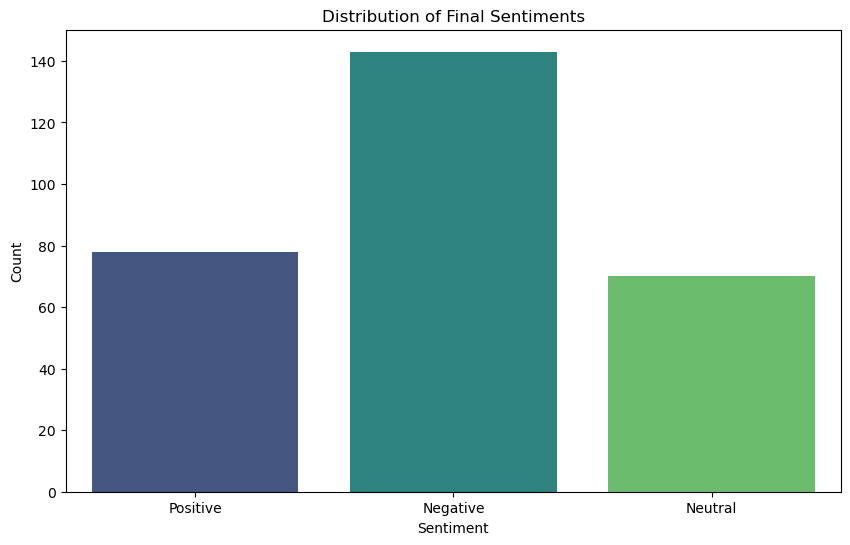

C:\Users\joaom\AppData\Local\Temp\ipykernel_8608\1299744140.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reviews.set_index('date').resample('M').vader_sentiment_updated.value_counts().unstack().plot(kind='line', marker='o')


<Figure size 1400x700 with 0 Axes>

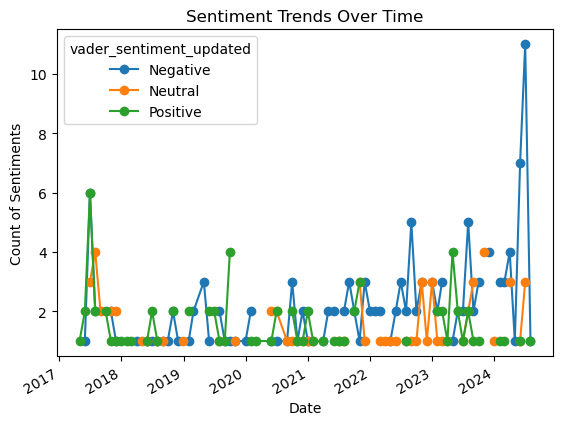

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='vader_sentiment_updated', data=reviews, palette='viridis')
plt.title('Distribution of Final Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 2. Sentiment Trends Over Time
plt.figure(figsize=(14, 7))
reviews.set_index('date').resample('M').vader_sentiment_updated.value_counts().unstack().plot(kind='line', marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Sentiments')
plt.show()

C:\Users\joaom\AppData\Local\Temp\ipykernel_8608\1906245679.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='roberta_sentiment', data=reviews, palette='viridis')


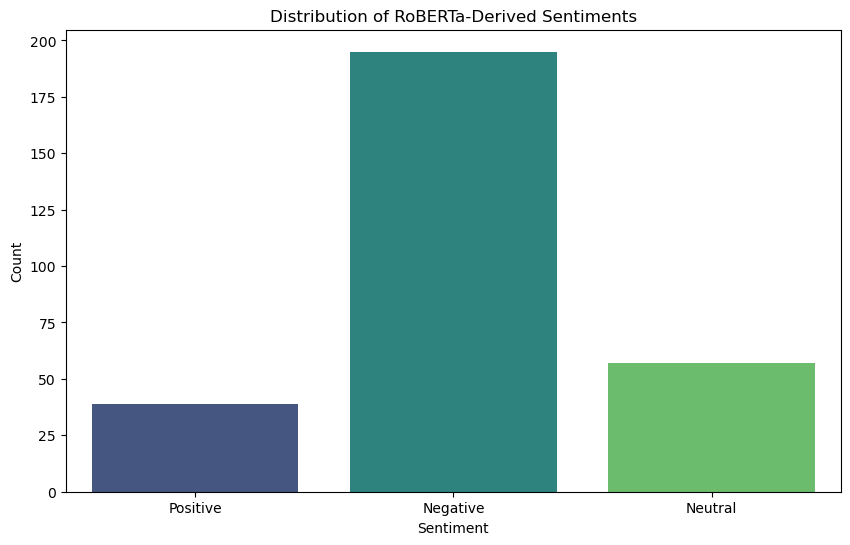

C:\Users\joaom\AppData\Local\Temp\ipykernel_8608\1906245679.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reviews.set_index('date').resample('M').roberta_sentiment.value_counts().unstack().plot(kind='line', marker='o')


<Figure size 1400x700 with 0 Axes>

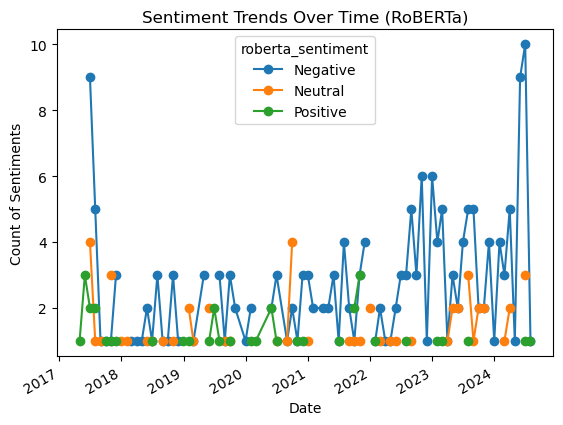

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='roberta_sentiment', data=reviews, palette='viridis')
plt.title('Distribution of RoBERTa-Derived Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 2. Sentiment Trends Over Time
plt.figure(figsize=(14, 7))
reviews.set_index('date').resample('M').roberta_sentiment.value_counts().unstack().plot(kind='line', marker='o')
plt.title('Sentiment Trends Over Time (RoBERTa)')
plt.xlabel('Date')
plt.ylabel('Count of Sentiments')
plt.show()



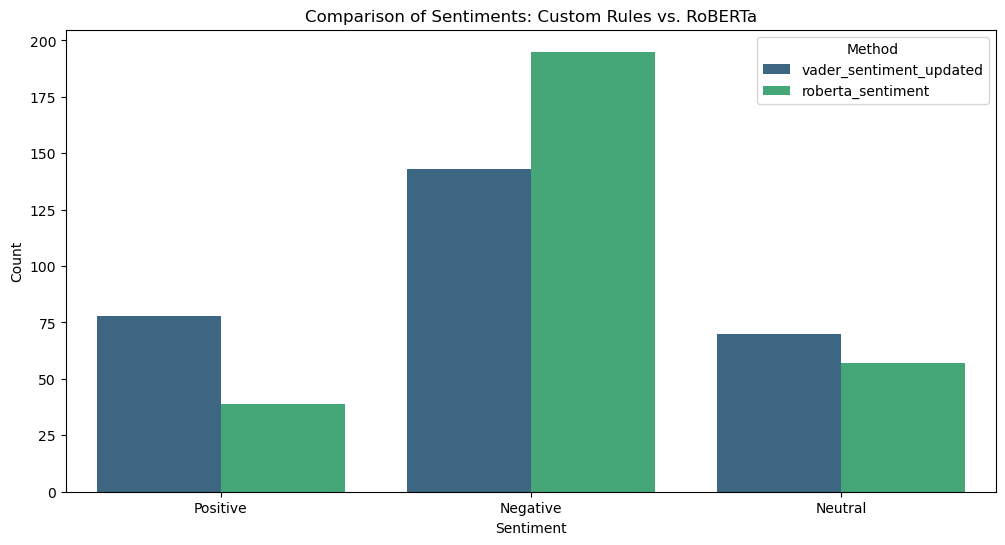

In [139]:
# Compare RoBERTa Sentiment with Custom Rules
comparison = reviews[['vader_sentiment_updated', 'roberta_sentiment']].copy()
comparison_melted = comparison.melt(var_name='method', value_name='sentiment')

plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment', hue='method', data=comparison_melted, palette='viridis')
plt.title('Comparison of Sentiments: Custom Rules vs. RoBERTa')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Method')
plt.show()

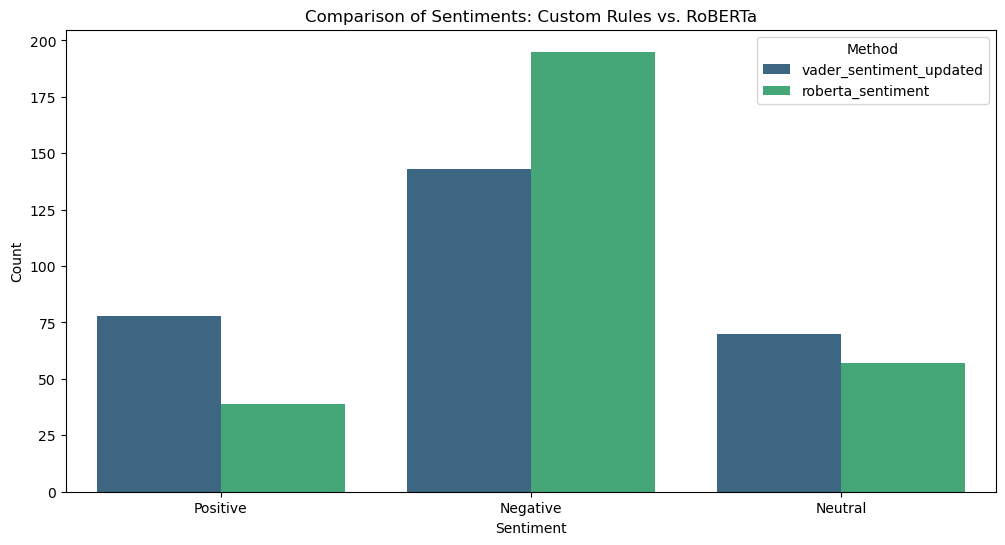

In [120]:
# Compare RoBERTa Sentiment with Custom Rules
comparison = reviews[['vader_sentiment_updated', 'roberta_sentiment']].copy()
comparison_melted = comparison.melt(var_name='method', value_name='sentiment')

plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment', hue='method', data=comparison_melted, palette='viridis')
plt.title('Comparison of Sentiments: Custom Rules vs. RoBERTa')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Method')
plt.show()

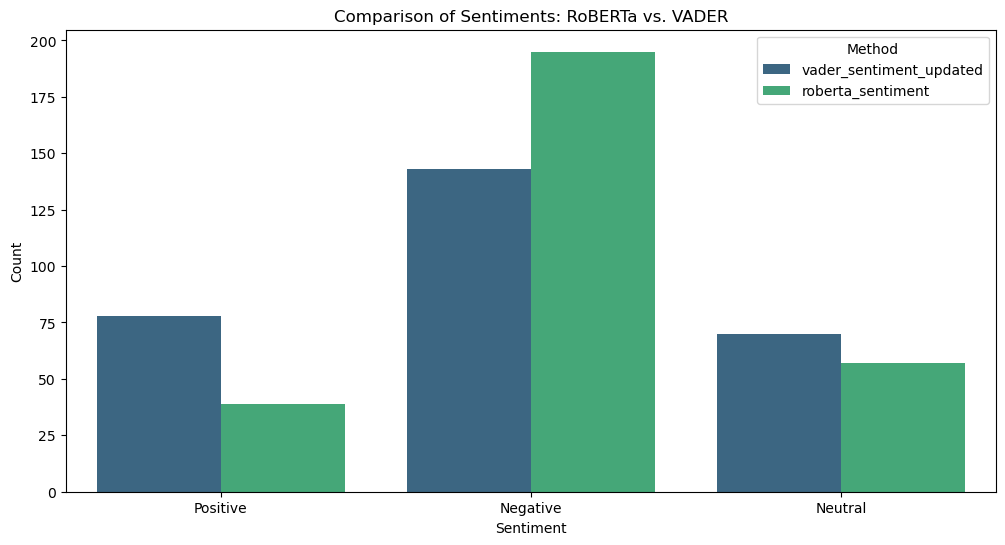

In [123]:
# Compare RoBERTa and VADER Sentiments
comparison = reviews[['vader_sentiment_updated', 'roberta_sentiment']].copy()
comparison_melted = comparison.melt(var_name='method', value_name='sentiment')

plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment', hue='method', data=comparison_melted, palette='viridis')
plt.title('Comparison of Sentiments: RoBERTa vs. VADER')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Method')
plt.show()

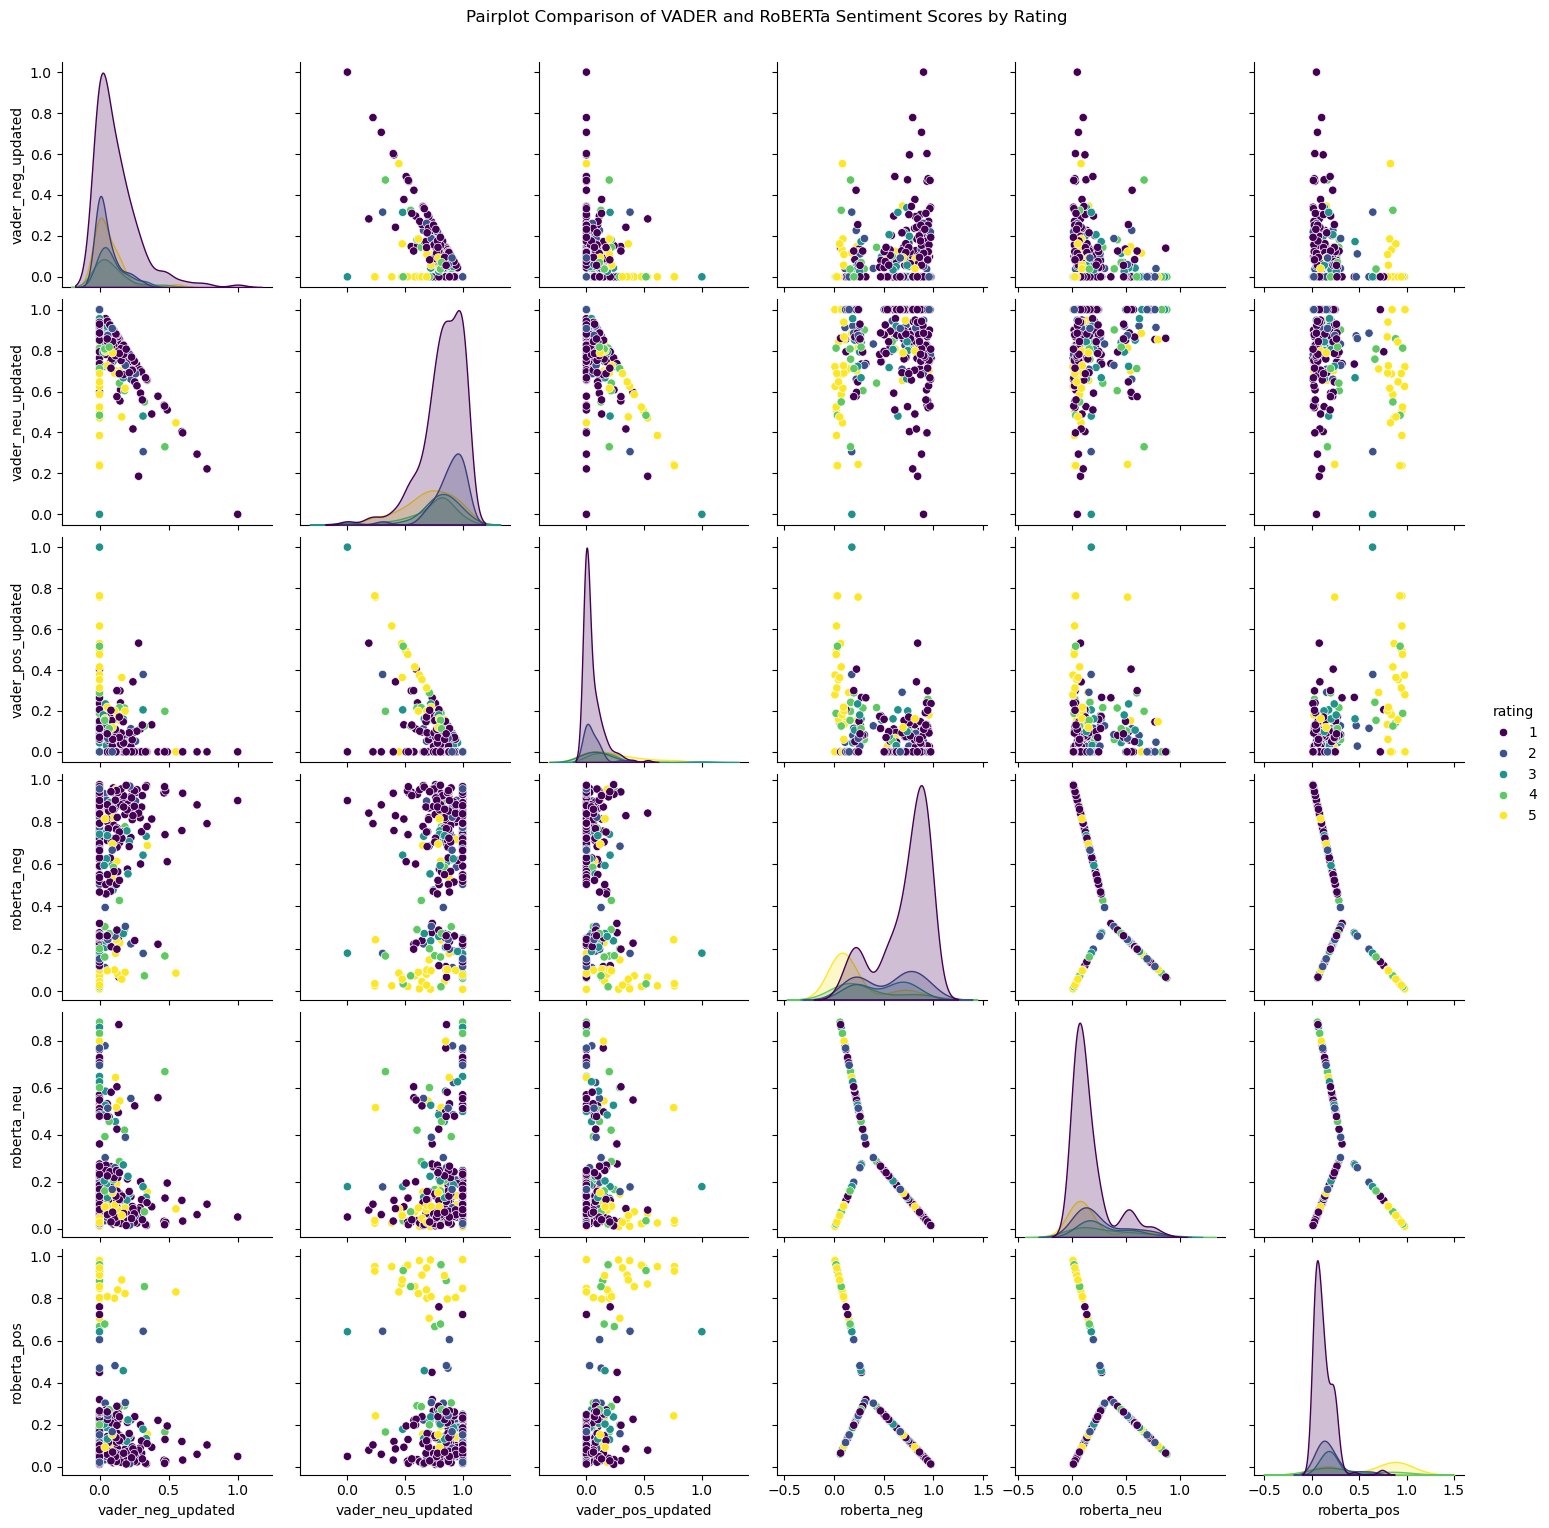

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for comparison and include the rating column
pairplot_data = reviews[['vader_neg_updated', 'vader_neu_updated', 'vader_pos_updated', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'rating']]

# Create the pairplot with rating as the hue
sns.pairplot(pairplot_data, hue='rating', palette='viridis')
plt.suptitle('Pairplot Comparison of VADER and RoBERTa Sentiment Scores by Rating', y=1.02)
plt.show()

# Review Examples:

Lets look at some examples where the model scoring and review score are different the most (1 star to 5 star reviews )

In [127]:
# Query for reviews with a rating of 5 and sort by RoBERTa negative score in descending order
top_discrepancy_reviews = reviews.query('rating == 5').sort_values('roberta_neg', ascending=False)[['review', 'review_english', 'roberta_neg']].head(10)

# Display the result
for index, row in top_discrepancy_reviews.iterrows():
    print(f"Original Review: {row['review']}")
    print(f"Translated Review: {row['review_english']}")
    print(f"RoBERTa Negative Score: {row['roberta_neg']}\n")


Original Review: Na minha rua anda um pit bul enorme e atira se as pessoas e aos animais e o dono ameaça as pessoas Boa da para resolver porque o animal ataca já liguei para a PSP e nada fazem até que algo grave aconteca
Translated Review: In my street a huge pit bul is and shoots if people and animals and the owner threatens the good people to solve because the animal attacks I already called PSP and do nothing until something serious happens
RoBERTa Negative Score: 0.9545252919197083

Original Review: 1) Na Praça José Queróz estão montados entradas de passageiros em dezenas de carreiras várias da carris outras muitas que vão para o exterior da cidade. tanto uma da carris como exteriores têm aqui o seu terminal. São centenas de pessoas que no passeio Este da Praça, junto das paragens passam. Porque é que neste local não é instalado serviços sanitários, convenientes se há espaço? Até onde existe ainda uma casa fechada, com ainda publicidade que foi de venda de jornais e revistas, não é

In [128]:
# Query for reviews with a rating of 5 and sort by RoBERTa positive score in descending order
top_discrepancy_reviews = reviews.query('rating == 5').sort_values('roberta_pos', ascending=False)[['review', 'review_english', 'roberta_pos']].head(10)

# Display the result
for index, row in top_discrepancy_reviews.iterrows():
    print(f"Original Review: {row['review']}")
    print(f"Translated Review: {row['review_english']}")
    print(f"RoBERTa Positive Score: {row['roberta_pos']}\n")

Original Review: Este Serviço da CM Lisboa, tem sido extraordinário é muito eficiente. Todas as ocorrências por mim endereçadas, são sempre executadas atempadamente. Parabéns a toda a equipa que faz deste Serviço "excelente". Teresa Sousa
Translated Review: This service of CM Lisbon has been extraordinary is very efficient.All occurrences addressed by me are always performed in time.Congratulations to the whole team that makes this service "excellent".Teresa Sousa
RoBERTa Positive Score: 0.9843660593032837

Original Review: Esta app está agora muito mais fácil de utilizar. Acessível e intuitiva. Parabéns. Esperemos que os serviços que os serviços disponibilizados possam passar a ser tão eficientes quanto esta APP.
Translated Review: This app is now much easier to use.Accessible and intuitive.Congratulations.We hope that the services that the services available can become as efficient as this app.
RoBERTa Positive Score: 0.9830625057220459

Original Review: Fantástica app. boa resposta 

In [146]:
# Function to display top 10 discrepant reviews based on the given query and sort conditions
def display_top_discrepant_reviews(query, sort_by, ascending, description):
    top_discrepancy_reviews = reviews.query(query).sort_values(sort_by, ascending=ascending)[['review', 'review_english', sort_by]].head(10)
    # Print the description with larger headline
    print(f"\033[1;34mTop 10 reviews for {description}:\033[0m\n")
    for index, row in top_discrepancy_reviews.iterrows():
        print(f"Original Review: {row['review']}")
        print(f"Translated Review: {row['review_english']}")
        print(f"{sort_by.capitalize()}: {row[sort_by]}\n")

# 1. Reviews with a rating of 5, sorted by RoBERTa negative score in descending order
display_top_discrepant_reviews('rating == 5', 'roberta_neg', False, 'rating of 5 sorted by RoBERTa negative score')

# 2. Reviews with a rating of 5, sorted by RoBERTa positive score in descending order
display_top_discrepant_reviews('rating == 5', 'roberta_pos', False, 'rating of 5 sorted by RoBERTa positive score')

# 3. Reviews with a rating of 1, sorted by RoBERTa negative score in descending order
display_top_discrepant_reviews('rating == 1', 'roberta_neg', False, 'rating of 1 sorted by RoBERTa negative score')

# 4. Reviews with a rating of 1, sorted by RoBERTa positive score in descending order
display_top_discrepant_reviews('rating == 1', 'roberta_pos', False, 'rating of 1 sorted by RoBERTa positive score')


Top 10 reviews for rating of 5 sorted by RoBERTa negative score:

Original Review: Na minha rua anda um pit bul enorme e atira se as pessoas e aos animais e o dono ameaça as pessoas Boa da para resolver porque o animal ataca já liguei para a PSP e nada fazem até que algo grave aconteca
Translated Review: In my street a huge pit bul is and shoots if people and animals and the owner threatens the good people to solve because the animal attacks I already called PSP and do nothing until something serious happens
Roberta_neg: 0.9545252919197083

Original Review: 1) Na Praça José Queróz estão montados entradas de passageiros em dezenas de carreiras várias da carris outras muitas que vão para o exterior da cidade. tanto uma da carris como exteriores têm aqui o seu terminal. São centenas de pessoas que no passeio Este da Praça, junto das paragens passam. Porque é que neste local não é instalado serviços sanitários, convenientes se há espaço? Até onde existe ainda uma casa fechada, com ainda pu

# Code to Create rating_by_roberta Column:

In [131]:
# Function to map RoBERTa sentiment to rating
def map_sentiment_to_rating(sentiment):
    if sentiment == 'Negative':
        return 1
    elif sentiment == 'Neutral':
        return 3
    elif sentiment == 'Positive':
        return 5

# Apply the mapping function to create the 'rating_by_roberta' column
reviews['rating_by_roberta'] = reviews['roberta_sentiment'].apply(map_sentiment_to_rating)

# Display a sample of the DataFrame to check the new column
print(reviews[['review_english', 'roberta_sentiment', 'rating_by_roberta']].head())


                                                                     review_english  \
0                                                      Very practical and effective   
1                                      It is not possible to submit, invalid email!   
2                                                      Impossible to access app ...   
3  Application presents the error, "can not present information" is not functional.   
4                                              An excellent idea badly implemented.   

  roberta_sentiment  rating_by_roberta  
0          Positive                  5  
1          Negative                  1  
2          Negative                  1  
3          Negative                  1  
4          Positive                  5  


# Final Ratings

In [132]:
# Calculate the average user rating
final_user_rating = reviews['rating'].mean()

# Calculate the average user rating for Google Store app users
final_user_rating_google = reviews[reviews['app'] == 'google']['rating'].mean()

# Calculate the average user rating for Apple Store app users
final_user_rating_apple = reviews[reviews['app'] == 'apple']['rating'].mean()

# Calculate the average rating based on the `rating_by_roberta` column
final_roberta_rating = reviews['rating_by_roberta'].mean()

# Calculate the average rating based on the `rating_by_roberta` column for Google Store app users
final_roberta_rating_google = reviews[reviews['app'] == 'google']['rating_by_roberta'].mean()

# Calculate the average rating based on the `rating_by_roberta` column for Apple Store app users
final_roberta_rating_apple = reviews[reviews['app'] == 'apple']['rating_by_roberta'].mean()

# Print the final ratings
print('1 - True rating by Apple users: 1,4') 
print('2 - True rating by users of the Google Store app: 2,5') 
print(f"3 - Final rating by users: {final_user_rating:.2f}")
print(f"4 - Final rating by users of the Google Store app: {final_user_rating_google:.2f}")
print(f"5 - Final rating by Apple users: {final_user_rating_apple:.2f}")
print(f"6 - Final rating by users (RoBERTa): {final_roberta_rating:.2f}")
print(f"7 - Final rating by Google Store app users (RoBERTa): {final_roberta_rating_google:.2f}")
print(f"8 - Final rating by Apple users (RoBERTa): {final_roberta_rating_apple:.2f}")


1 - True rating by Apple users: 1,4
2 - True rating by users of the Google Store app: 2,5
3 - Final rating by users: 2.04
4 - Final rating by users of the Google Store app: 2.38
5 - Final rating by Apple users: 1.61
6 - Final rating by users (RoBERTa): 1.93
7 - Final rating by Google Store app users (RoBERTa): 2.10
8 - Final rating by Apple users (RoBERTa): 1.71


# Final Technical Analysis of the *Na Minha Rua* Application Reviews

**Note**:This analysis was conducted using a selection of review samples extracted from user feedback on the *Na Minha Rua* application (**positive_reviews.csv & negativee_reviews.csv**). These samples were processed and analyzed using Claude, an advanced AI tool, to derive the following insights. The analysis focuses on identifying key problem areas, recurring themes, and actionable recommendations to improve the application.

## Key Problems Identified

### Access and Login Issues
- **Description**: Many users experience significant difficulties accessing the application. Reported problems include:
  - Invalid credentials (e.g., João Araujo, Aze Teka, Diana David).
  - Server errors (e.g., João Mm, Nazare Tojal).
  - Inability to recover passwords (e.g., Bruno, Ângela Braga).
- **Impact**: These issues prevent users from using the application, resulting in a frustrating and unsatisfactory experience.

### Difficulties in Reporting Issues
- **Description**: Users frequently cannot report issues due to:
  - Failures in the photo attachment functionality (e.g., Ricardo Carvalho, Cátia Barroso).
  - Problems with manual location settings (e.g., Tons & Volumes Cabeleireiro, Joana Pereira).
  - Dependence on GPS for creating reports and location inaccuracies (e.g., Célia Neves, a Google user).
- **Impact**: These challenges compromise the application's effectiveness in addressing civic complaints.

### Resolution of Reported Issues
- **Description**: Users express frustration with the lack of actual resolution for reported issues. Many cases are marked as resolved without effective intervention (e.g., Rui Machado, Nuno Pereira, Mário Macheta).
- **Impact**: The application’s credibility is diminished, leading to perceptions of inefficacy and distrust among users.

### Usability and Interface
- **Description**: The application interface is criticized for being unintuitive and technically problematic, including:
  - Non-functional buttons (e.g., Rita De Almeida, Pedro Dom).
  - Absence of creation dates for reported issues (e.g., F C).
  - Problems with the search field (e.g., Célia Neves).
- **Impact**: These issues negatively affect the user experience, hindering efficient navigation and use.

### Feedback and Customer Support
- **Description**: Recurring lack of effective customer support, including:
  - Insufficient or absent feedback (e.g., João Ribeiro, Rute Calheiros).
  - Difficulty in reopening or tracking reported issues (e.g., Rui Machado, Maria João Pires).
- **Impact**: User dissatisfaction grows, leading to a negative perception of the application’s service.

## Recurring Themes

### Need for Technical and Functional Improvements
- **Description**: Urgent fixes are required for login systems, GPS functionality, and photo attachment processes. Overall application stability and usability need significant improvement to avoid frequent failures (e.g., Artur Dias, Rodolfo Costa).

### Efficiency in Issue Resolution
- **Description**: A more effective system for tracking and resolving issues is critical. Cases should not be marked as resolved without actual intervention (e.g., Rui Machado, Maria João Pires).

### Enhancement of Interface and Usability
- **Description**: The interface needs to be simplified and made more intuitive. Improvements are required in search fields, location settings, and overall functionality (e.g., Rita De Almeida, Pedro Dom).

### Better Customer Support
- **Description**: Strengthening customer support is essential, with clear communication channels and prompt responses to reported issues (e.g., João Ribeiro, Rute Calheiros).

## Recommendations

### Immediate Technical Fixes
- **Actions**:
  - Address login problems, particularly with Facebook and Google credentials (e.g., João Araujo, Aze Teka).
  - Improve GPS functionality and enable more efficient manual location selection (e.g., Célia Neves, a Google user).

### Enhance User Interface
- **Actions**:
  - Make the interface more intuitive and functional, improving search fields, photo attachment features, and general navigation (e.g., Rita De Almeida, Pedro Dom).
  - Include essential information, such as creation dates for reported issues visible on the map (e.g., F C).

### Improve Issue Resolution Processes
- **Actions**:
  - Implement a more effective system for tracking and resolving issues, ensuring cases are not closed without real intervention (e.g., Rui Machado, Maria João Pires).
  - Provide clear and consistent feedback to users about the status of their issues (e.g., João Ribeiro, Rute Calheiros).

### Strengthen Customer Support
- **Actions**:
  - Bolster customer support with clear communication channels and quick responses to reported problems (e.g., João Ribeiro, Rute Calheiros).
  - Train the support team to handle technical issues and provide efficient solutions.
